<a href="https://colab.research.google.com/github/raj3si/Yes_bank_closing_time-predictions/blob/main/Yes_Bank_Stock_Closing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *
from statsmodels.stats.outliers_influence import variance_inflation_factor
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# loading the dataset
yes_df=pd.read_csv("/content/data_YesBank_StockPrices.csv")
yes_df

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


In [ ]:
# made copy of the dataset
df=yes_df.copy()

In [ ]:
# checking the column name
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [ ]:
# description of the dataset
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [ ]:
# information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [ ]:
# converting the dtype of date column into datetime
df["Date"]=pd.to_datetime(df["Date"].apply(lambda x: datetime.strptime(x,"%b-%y")))

In [ ]:
# checking the null value
df.isna().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [ ]:
# checking the duplicate value
df.duplicated().sum()

0

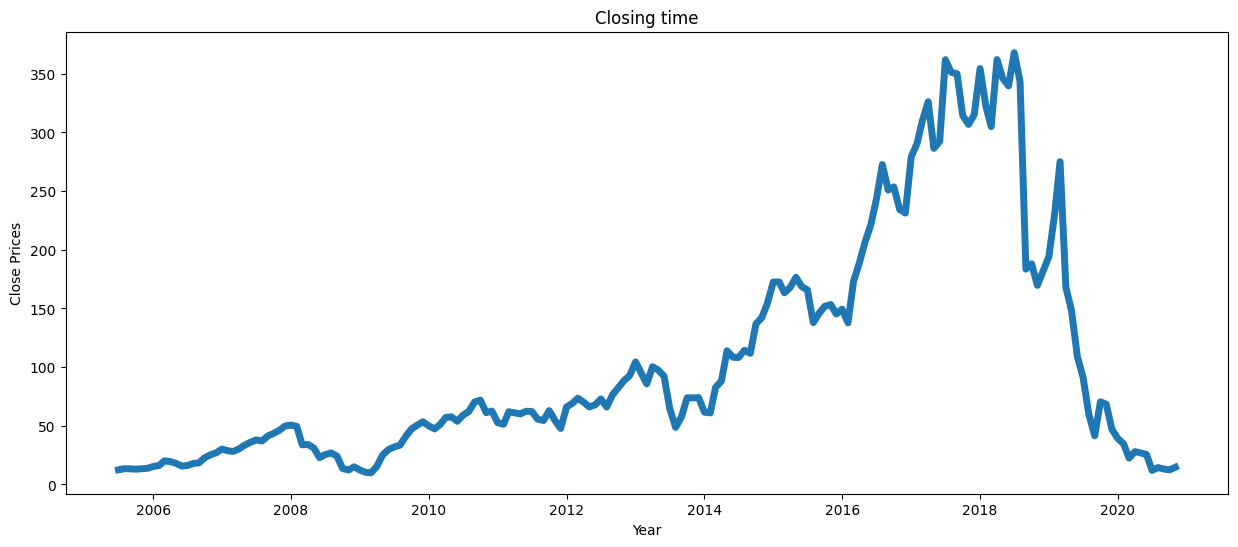

In [ ]:
# ploting line chart for the closing time with respect to year
plt.figure(figsize=(15,6))
plt.plot(df["Date"],df["Close"],linewidth=5)
plt.xlabel("Year")
plt.ylabel("Close Prices")
plt.title("Closing time")
plt.show()

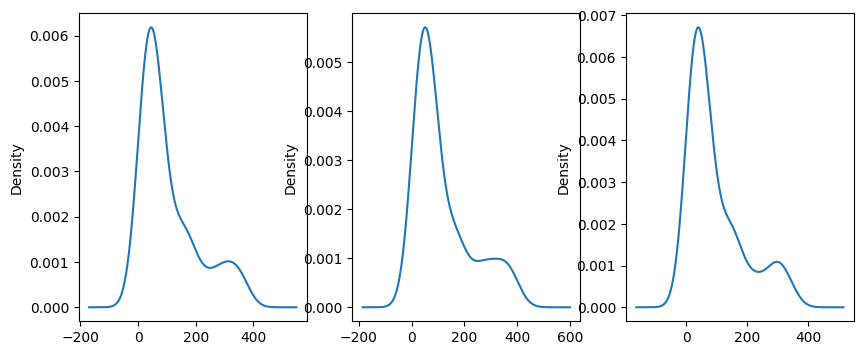

In [ ]:
# checking the distribution
plt.figure(figsize=(10,4))

plt.subplot(1,3,1)
df["Open"].plot(kind="kde")

plt.subplot(1,3,2)
df["High"].plot(kind="kde")

plt.subplot(1,3,3)
df["Low"].plot(kind="kde")
plt.show()

In [ ]:
# importing skew library from the stats
from scipy.stats import skew

Open
1.2554315780044336


<Figure size 640x480 with 0 Axes>

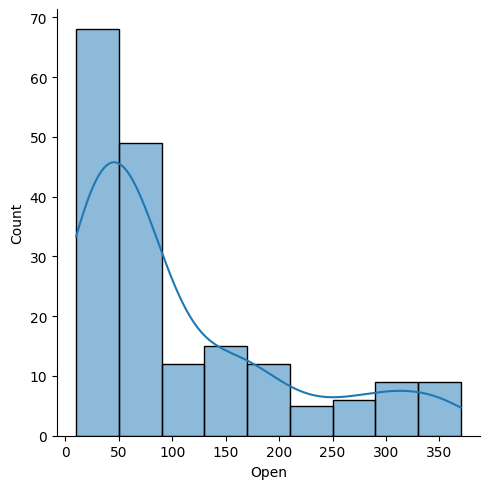

High
1.219038997718263


<Figure size 640x480 with 0 Axes>

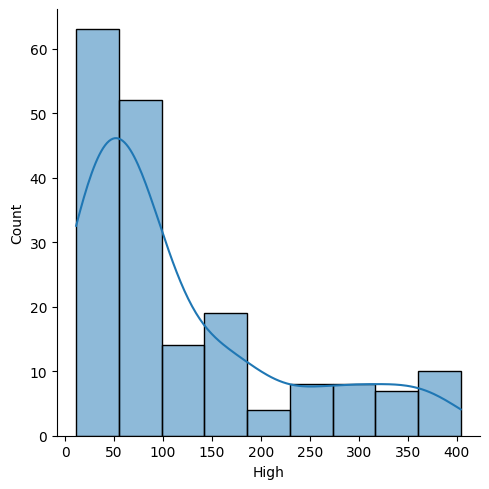

Low
1.2926773508147134


<Figure size 640x480 with 0 Axes>

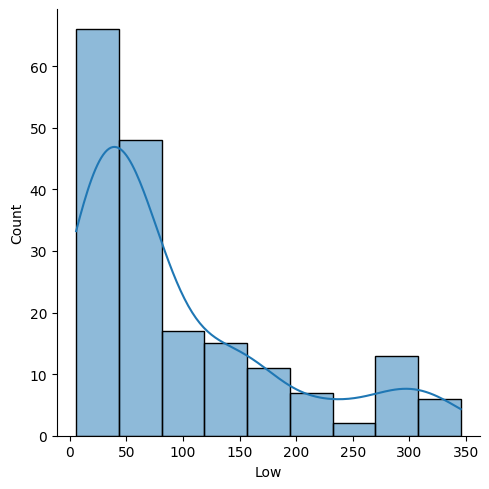

Close
1.254447477233428


<Figure size 640x480 with 0 Axes>

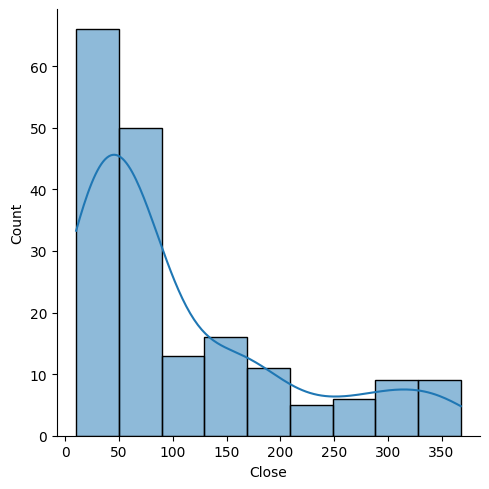

In [ ]:
# checking the skewness
for col in df.iloc[:,1:]:
  print(col)
  print(skew(df[col]))

  plt.figure()
  sns.displot(df[col],kde=True)
  plt.show()

In [ ]:
# to get skewness in all columns after applying square root transformation
df["sq_open"]=np.sqrt(df["Open"])
df["sq_high"]=np.sqrt(df["High"])
df["sq_low"]=np.sqrt(df["Low"])
df["sq_close"]=np.sqrt(df["Close"])
print("skew in sq_open:",skew(df["sq_open"]))
print("skew in sq_high:",skew(df['sq_high']))
print("skew in sq_low:",skew(df["sq_low"]))
print("skew in sq_close:",skew(df["sq_close"]))

skew in sq_open: 0.7000610466886524
skew in sq_high: 0.6881272177002438
skew in sq_low: 0.7108066078219077
skew in sq_close: 0.6992206611049262


In [ ]:
# to get skewness in all columns after applying log transformation
df["log_open"]=np.log10(df["Open"])
df["log_high"]=np.log10(df["High"])
df["log_low"]=np.log10(df["Low"])
df["log_close"]=np.log10(df["Close"])
print("skew in log_open",skew(df["log_open"]))
print("skew in log_high",skew(df["log_high"]))
print("skew in log_low",skew(df["log_low"]))
print("skew in log_low",skew(df["log_close"]))

skew in log_open -0.027720172598792246
skew in log_high -0.022935520523613907
skew in log_low -0.048272571446053125
skew in log_low -0.027026624204050928


sq_open
0.7000610466886524


<Figure size 640x480 with 0 Axes>

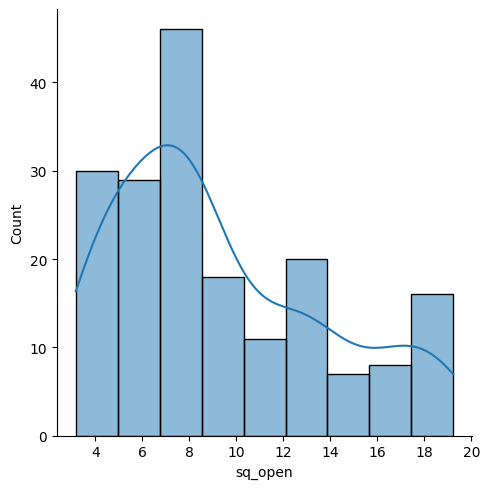

sq_high
0.6881272177002438


<Figure size 640x480 with 0 Axes>

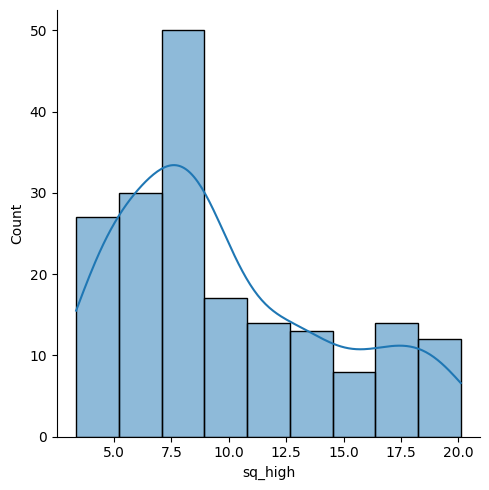

sq_low
0.7108066078219077


<Figure size 640x480 with 0 Axes>

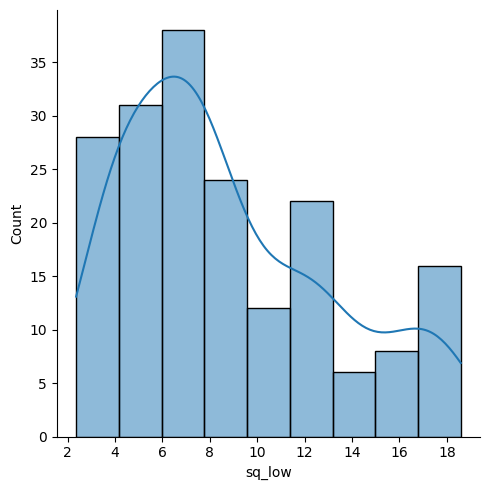

sq_close
0.6992206611049262


<Figure size 640x480 with 0 Axes>

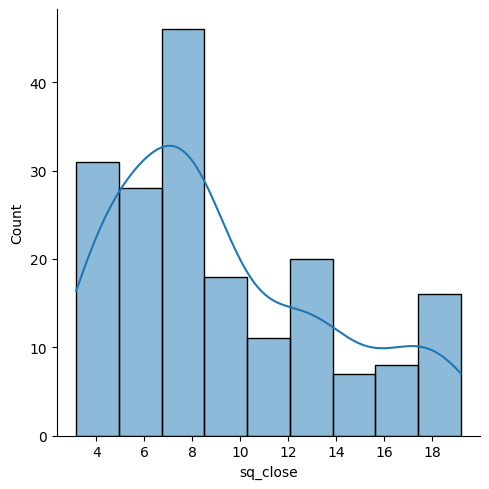

log_open
-0.027720172598792246


<Figure size 640x480 with 0 Axes>

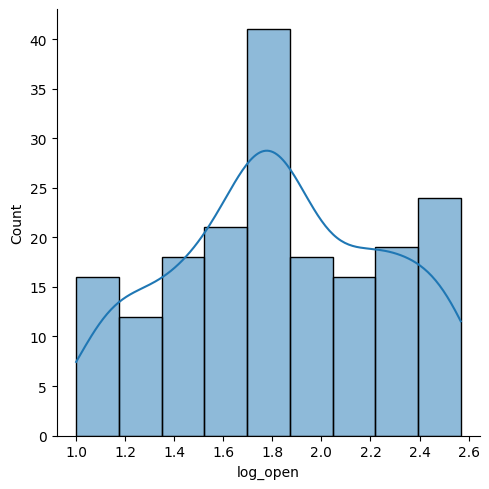

log_high
-0.022935520523613907


<Figure size 640x480 with 0 Axes>

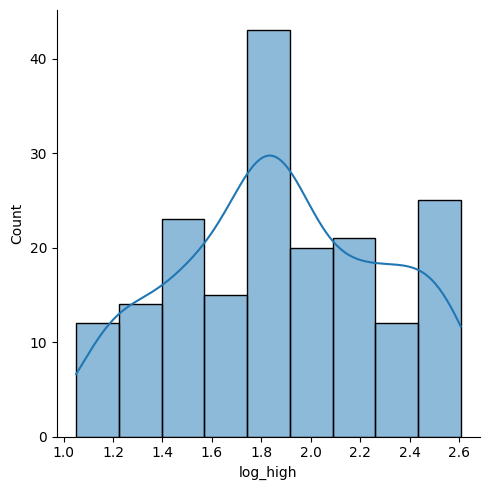

log_low
-0.048272571446053125


<Figure size 640x480 with 0 Axes>

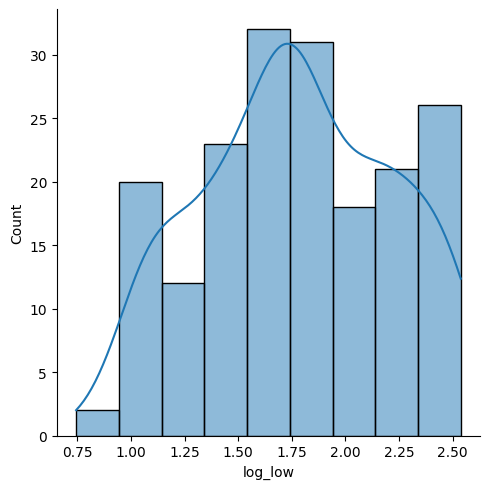

log_close
-0.027026624204050928


<Figure size 640x480 with 0 Axes>

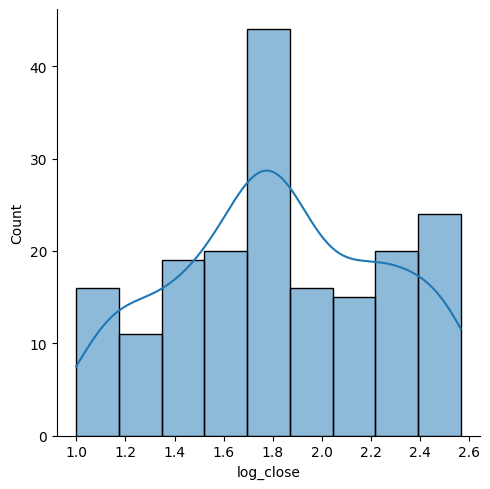

In [ ]:
# visualization for the chacking skewness
for col in df.iloc[:,5:]:
  print(col)
  print(skew(df[col]))

  plt.figure()
  sns.displot(df[col],kde=True)
  plt.show()

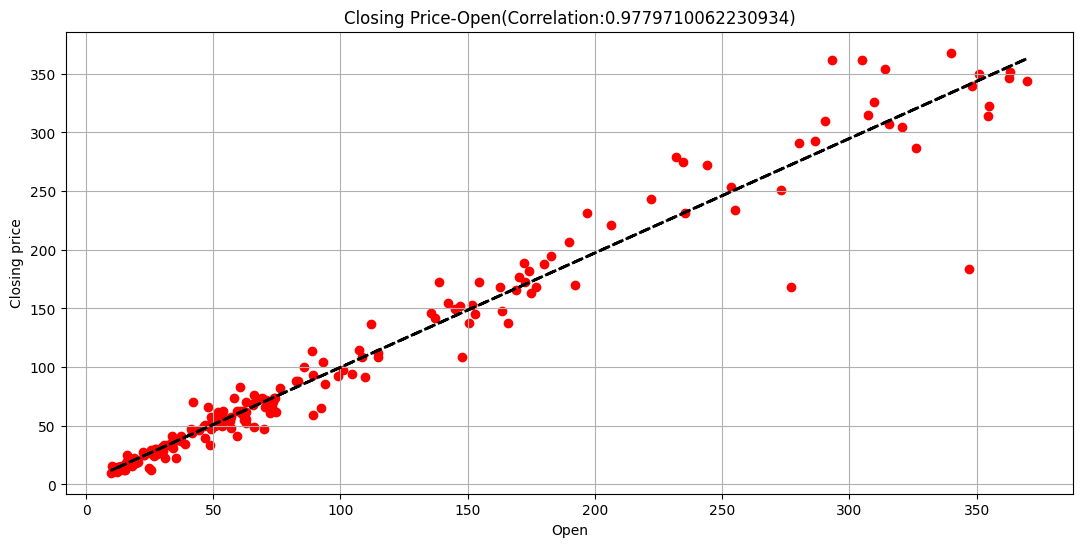

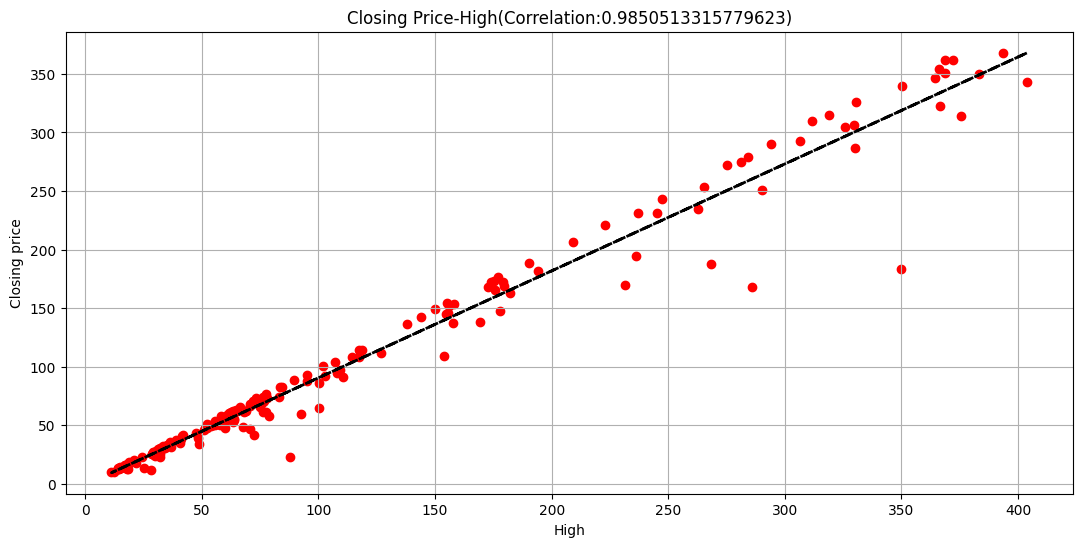

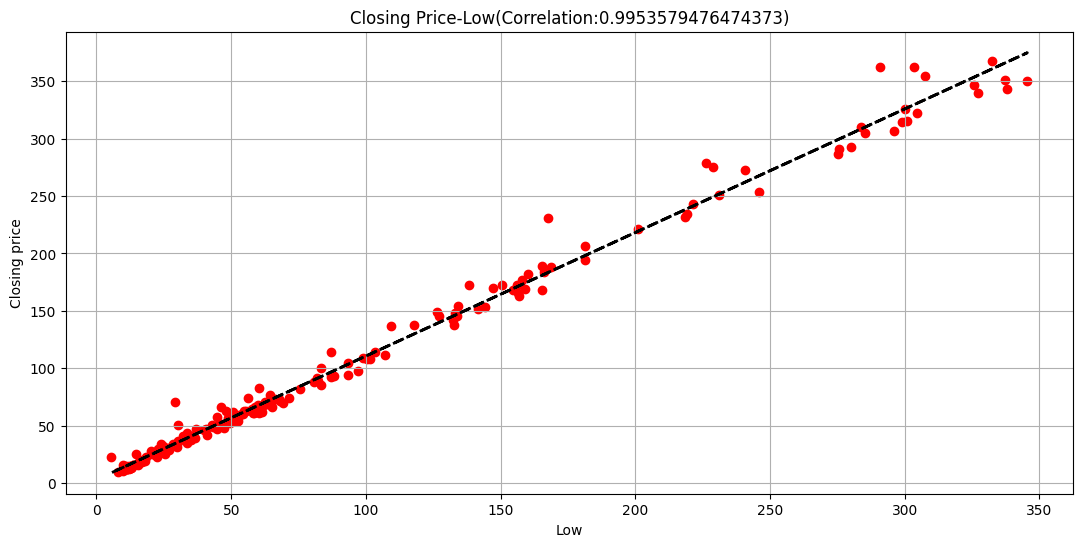

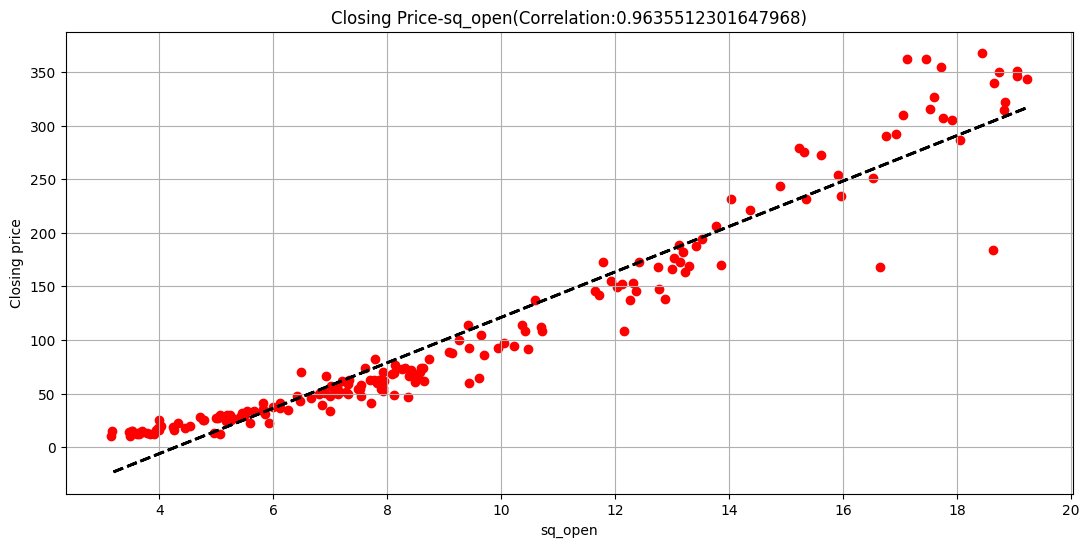

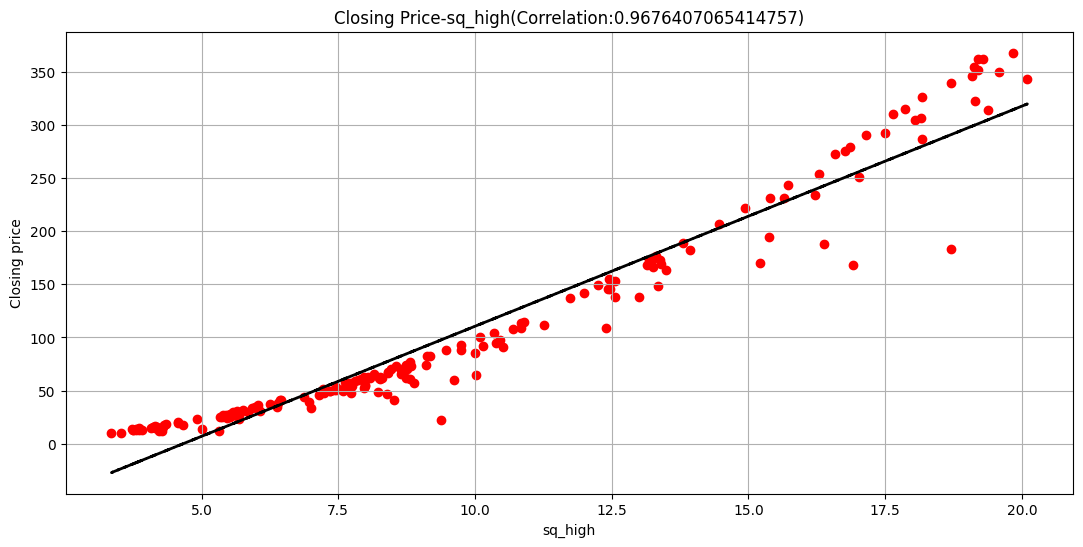

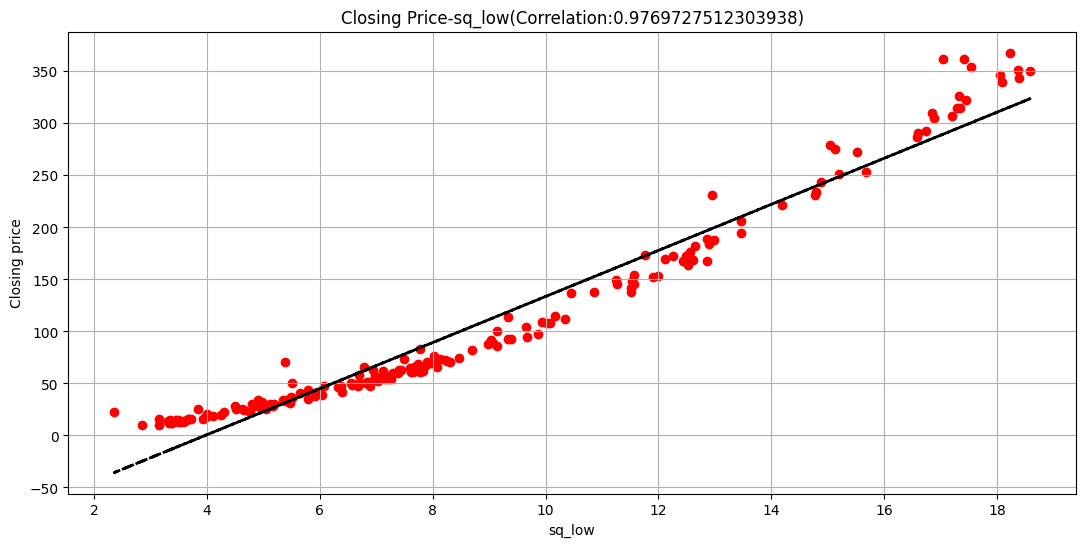

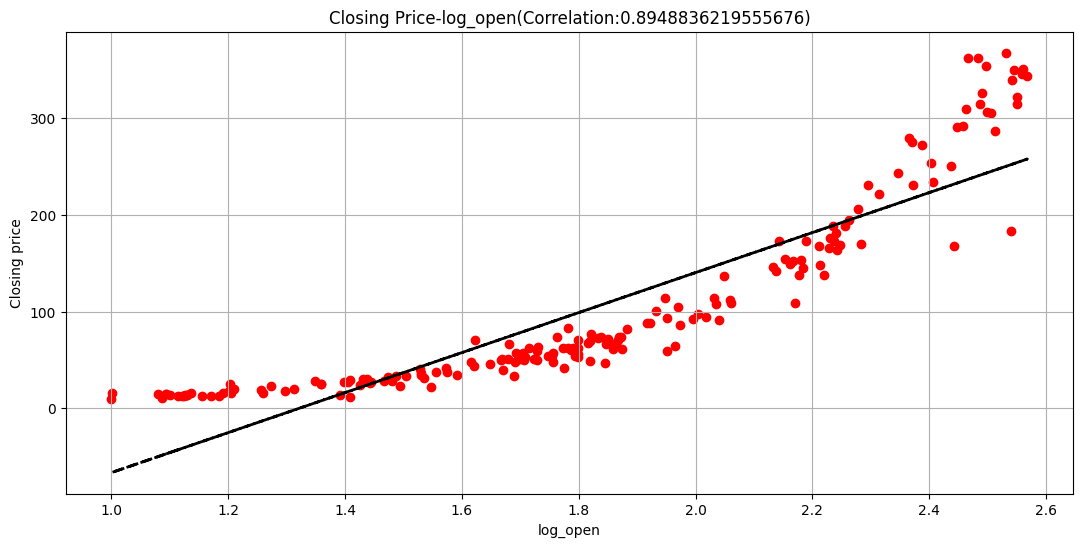

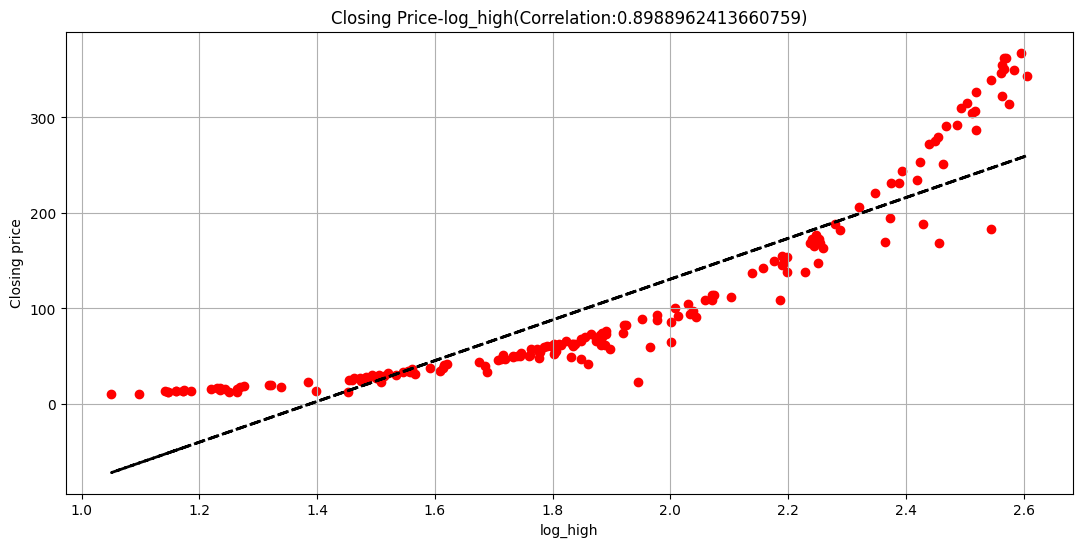

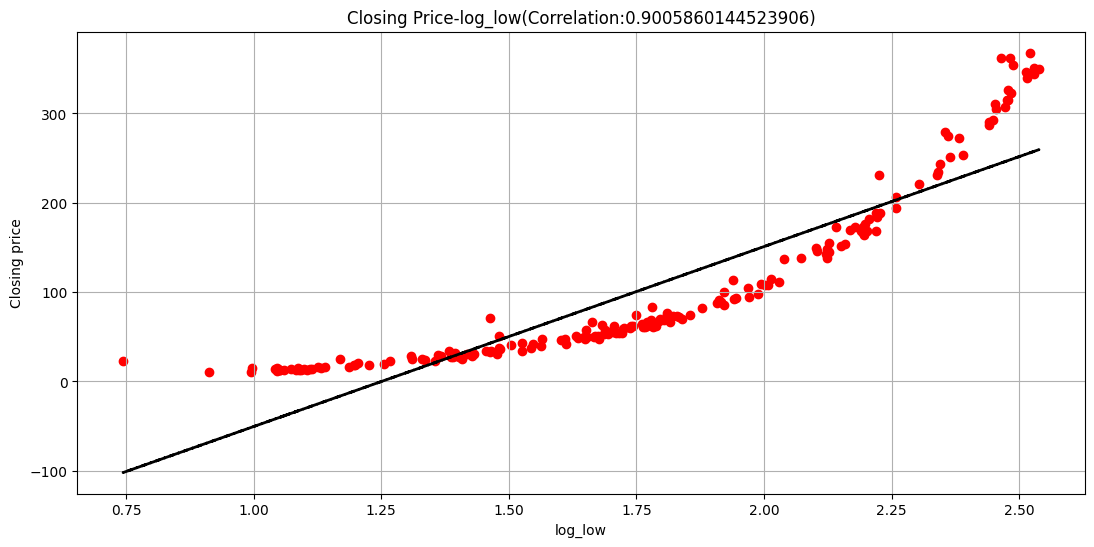

In [ ]:
# plotting the chart for checking the linear regression model
for dig in df.drop(columns=["Close","Date","sq_close","log_close"],axis=1):
  fig=plt.figure(figsize=(13,6))
  ax=fig.gca()
  feature=df[dig]
  label=df['Close']
  correlation=feature.corr(label)
  plt.scatter(x=feature,y=label,color="r")
  plt.ylabel("Closing price")
  plt.xlabel(dig)
  ax.set_title("Closing Price-"+ dig + "(" + "Correlation:" + str(correlation) + ")")
  z=np.polyfit(df[dig],label,1)
  y_hat=np.poly1d(z)(df[dig])

  plt.plot(df[dig],y_hat,"r--",lw=2,color='black')
  plt.grid()
plt.show()

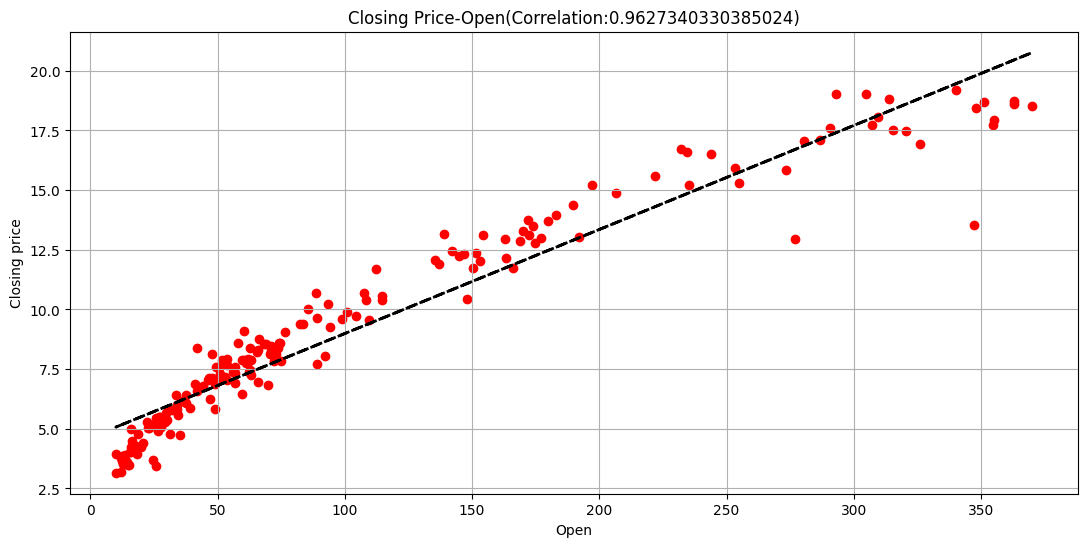

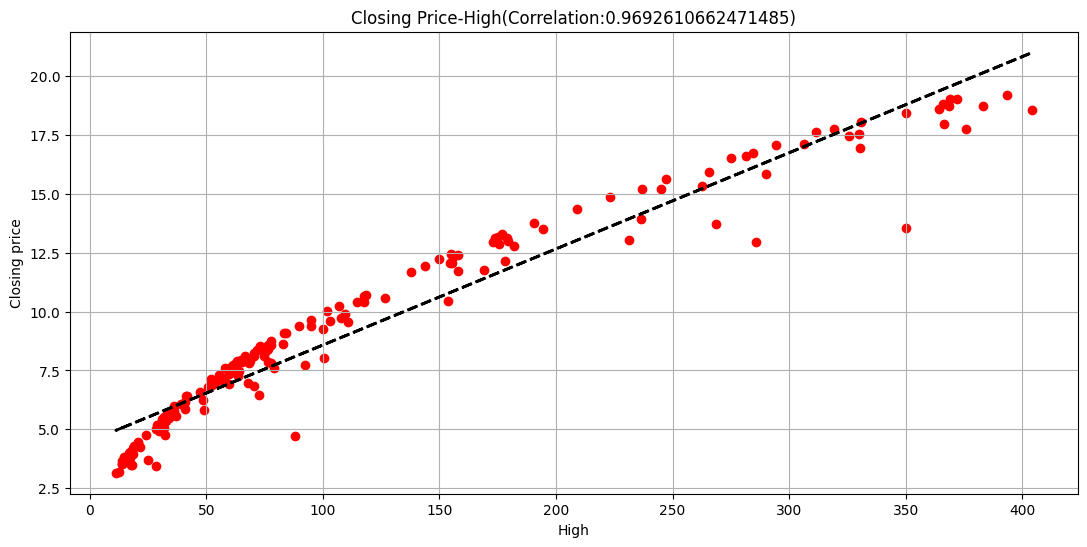

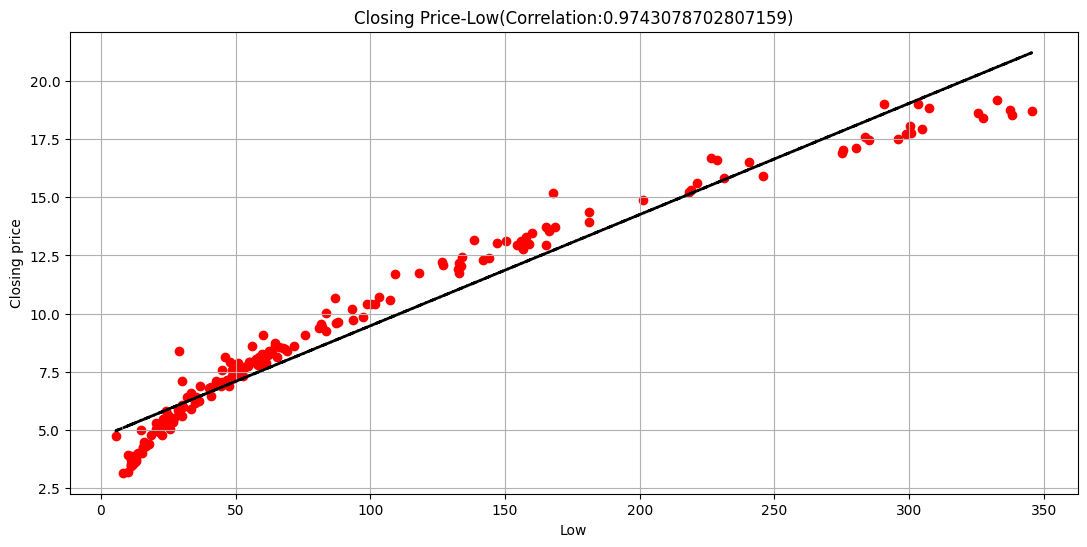

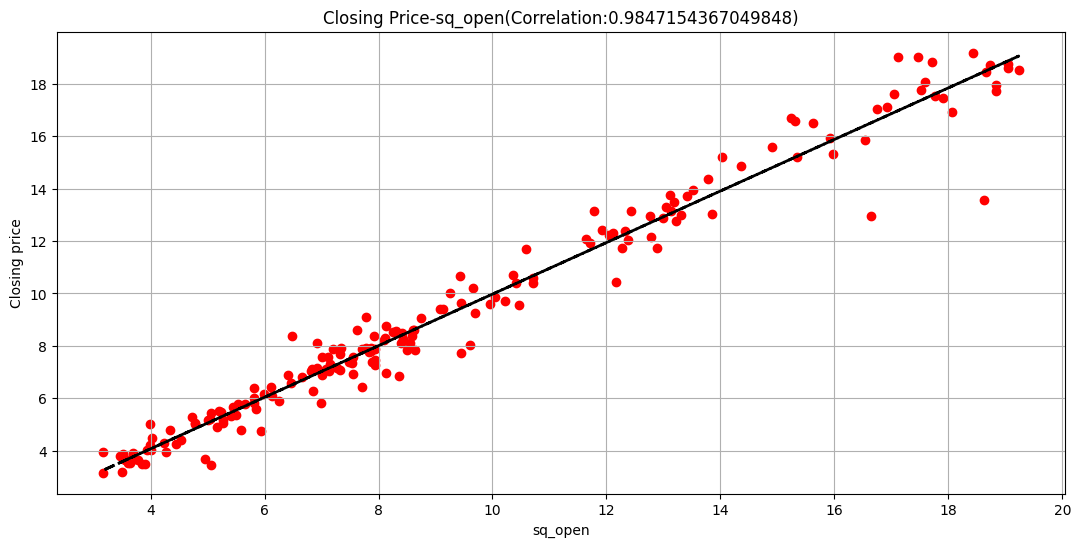

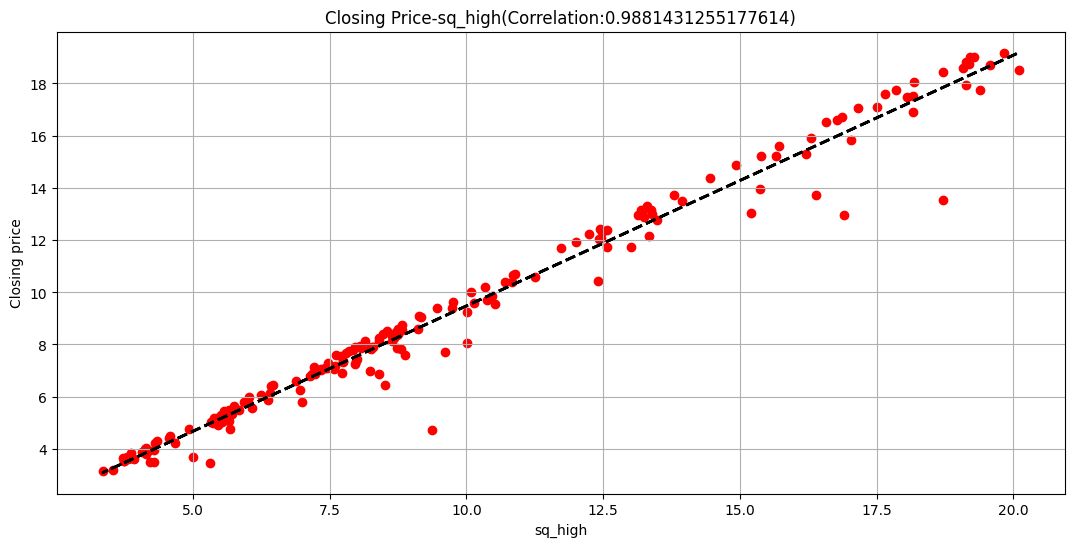

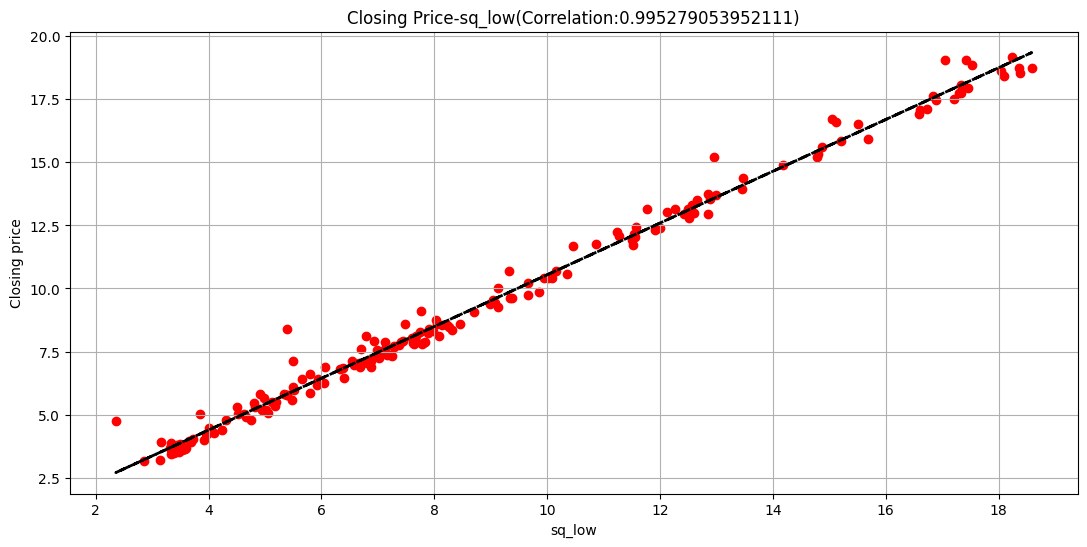

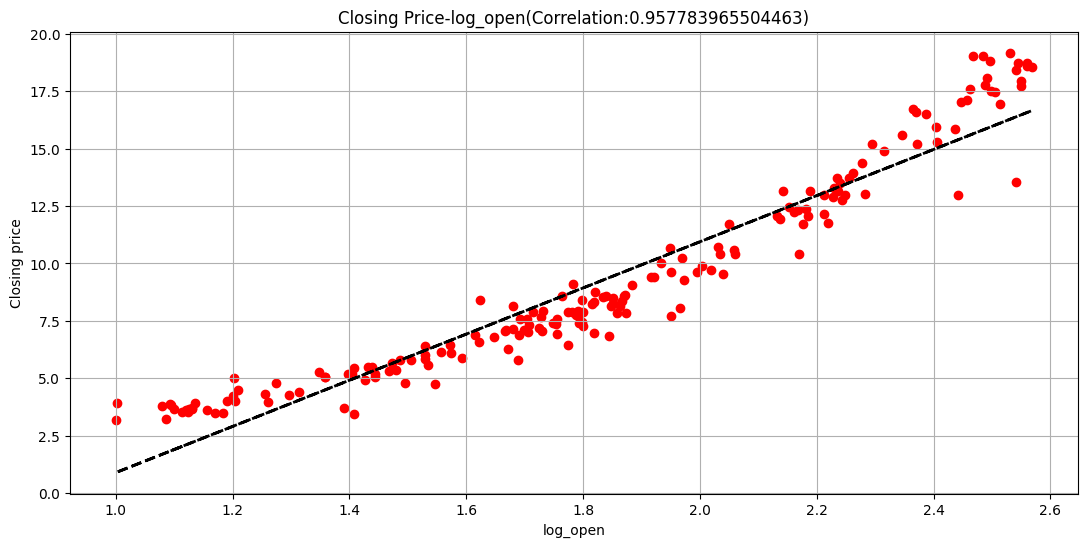

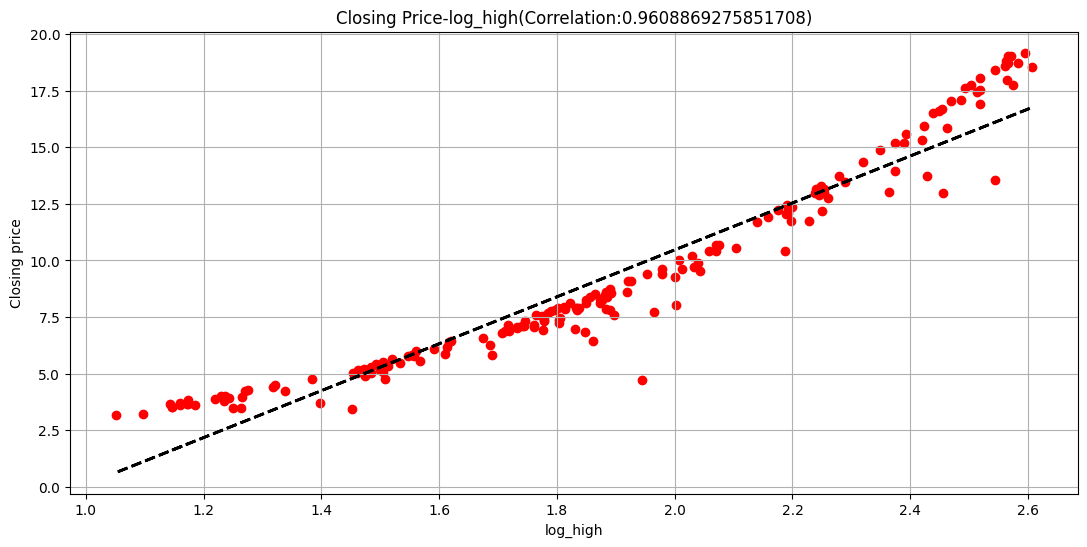

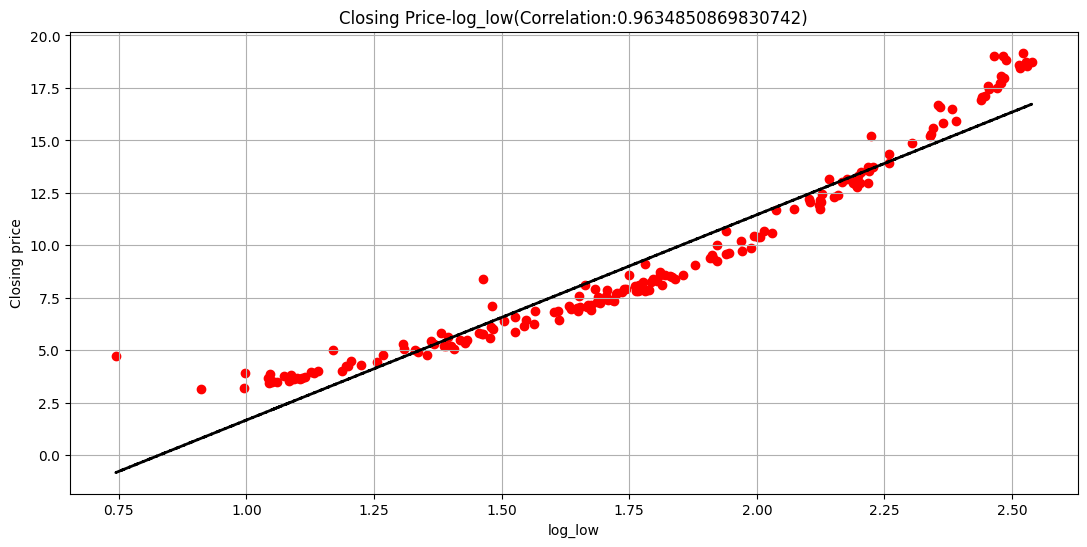

In [ ]:
# plotting the chart for checking the linear regression model after appling square root transoformation on closing price
for dig in df.drop(columns=["Close","Date","sq_close","log_close"],axis=1):
  fig=plt.figure(figsize=(13,6))
  ax=fig.gca()
  feature=df[dig]
  label=df['sq_close']
  correlation=feature.corr(label)
  plt.scatter(x=feature,y=label,color="r")
  plt.ylabel("Closing price")
  plt.xlabel(dig)
  ax.set_title("Closing Price-"+ dig + "(" + "Correlation:" + str(correlation) + ")")
  z=np.polyfit(df[dig],label,1)
  y_hat=np.poly1d(z)(df[dig])

  plt.plot(df[dig],y_hat,"r--",lw=2,color='black')
  plt.grid()
plt.show()

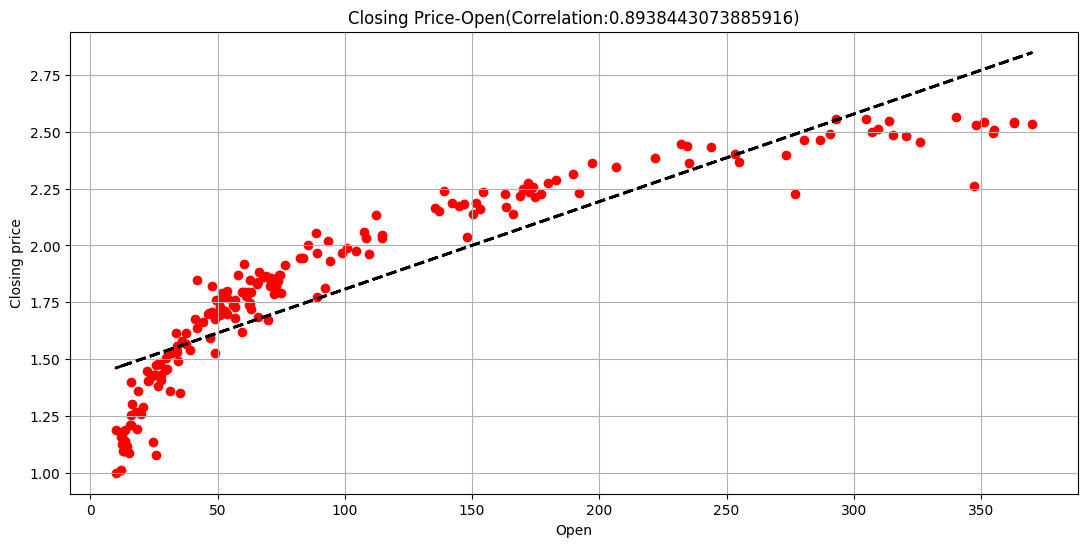

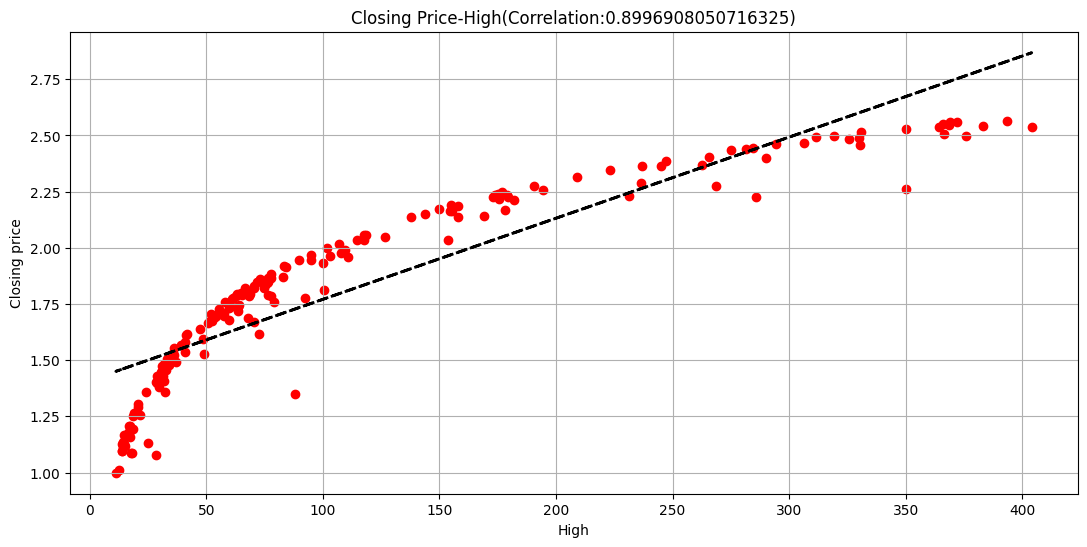

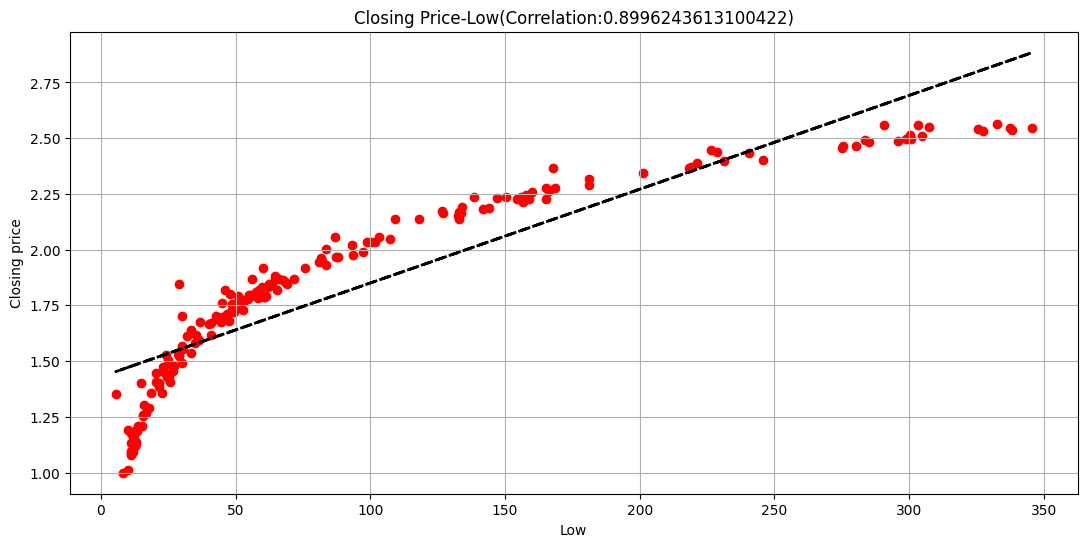

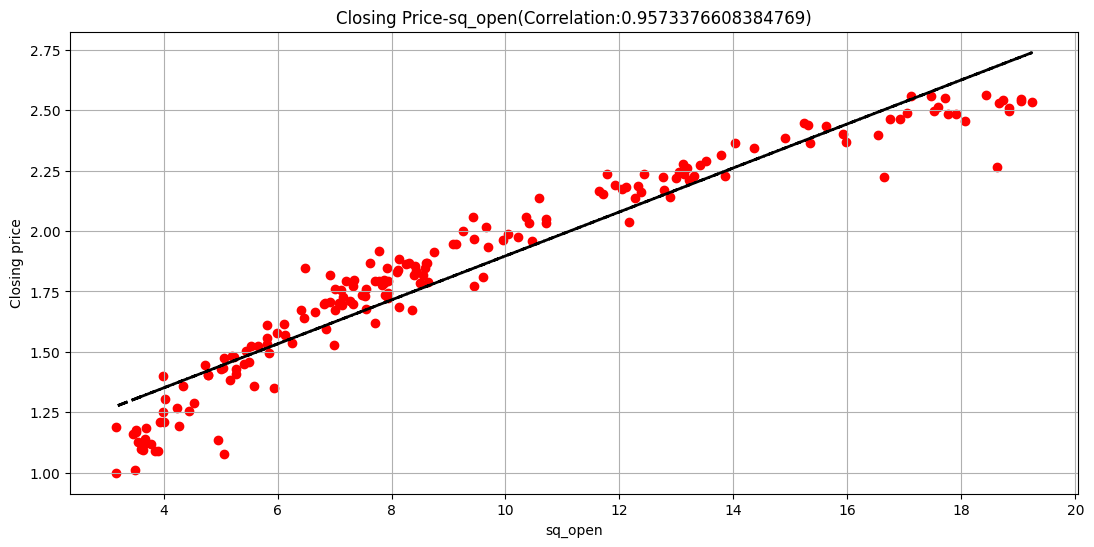

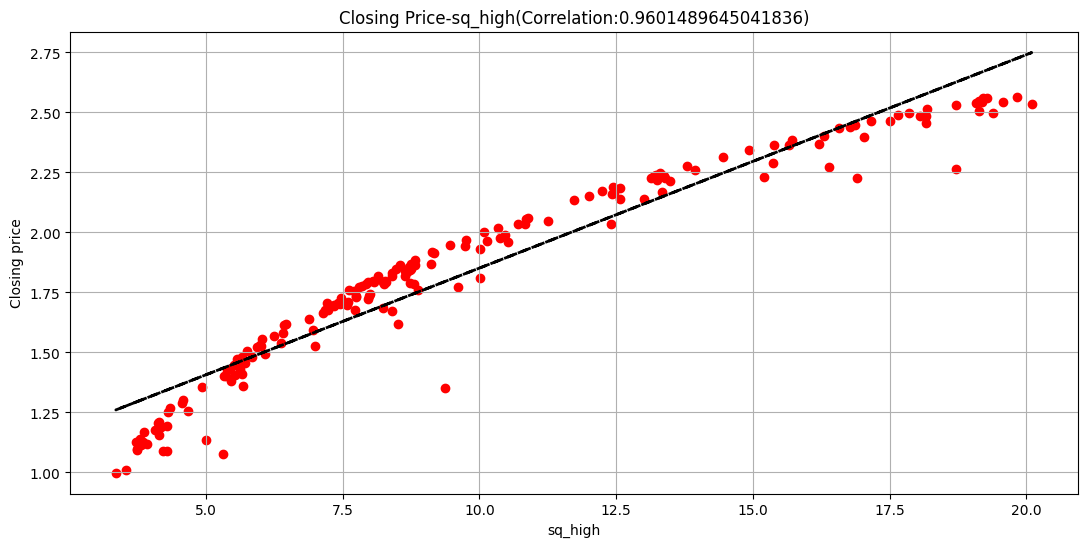

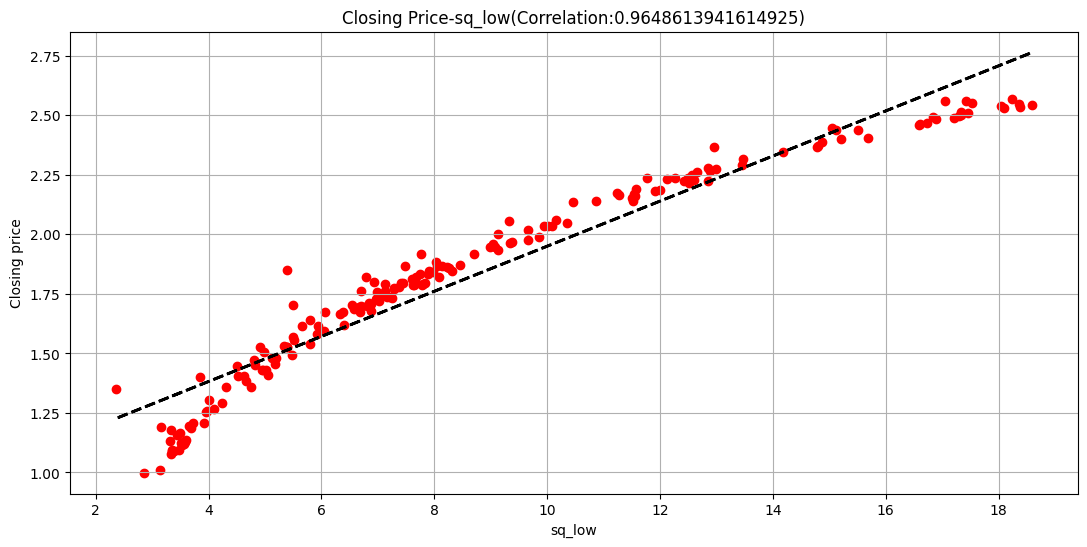

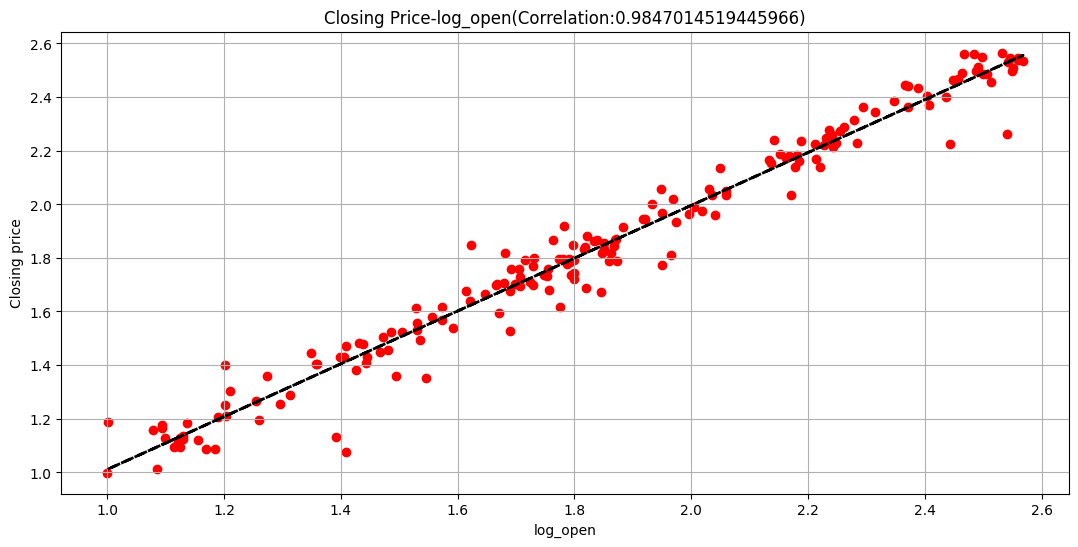

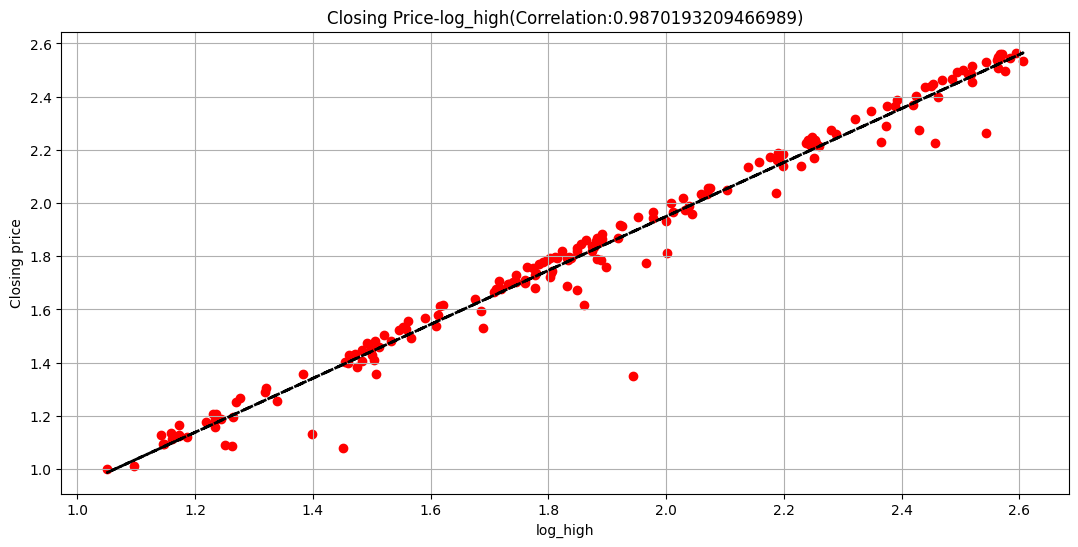

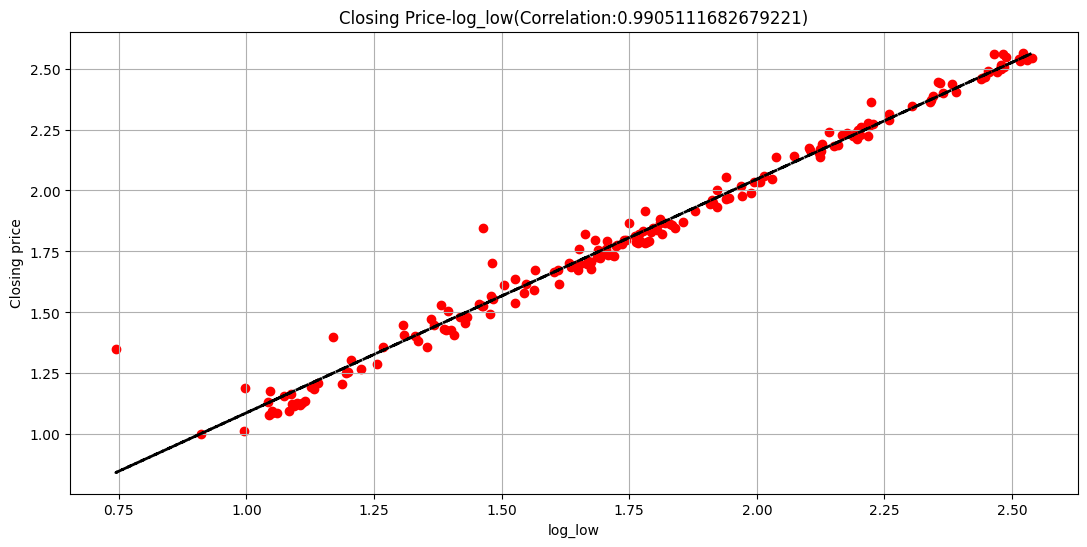

In [ ]:
# plotting the chart for checking the linear regression model after appling log transoformation on closing price
for dig in df.drop(columns=["Close","Date","sq_close","log_close"],axis=1):
  fig=plt.figure(figsize=(13,6))
  ax=fig.gca()
  feature=df[dig]
  label=df['log_close']
  correlation=feature.corr(label)
  plt.scatter(x=feature,y=label,color="r")
  plt.ylabel("Closing price")
  plt.xlabel(dig)
  ax.set_title("Closing Price-"+ dig + "(" + "Correlation:" + str(correlation) + ")")
  z=np.polyfit(df[dig],label,1)
  y_hat=np.poly1d(z)(df[dig])

  plt.plot(df[dig],y_hat,"r--",lw=2,color='black')
  plt.grid()
plt.show()

In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'sq_open', 'sq_high', 'sq_low',
       'sq_close', 'log_open', 'log_high', 'log_low', 'log_close'],
      dtype='object')

In [ ]:
# droping unnecessary columns
df1=df.drop(columns=["log_open","log_high","log_low","sq_open","sq_high","sq_low","Date","log_close","sq_close",],axis=1)

In [ ]:
df1.columns

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

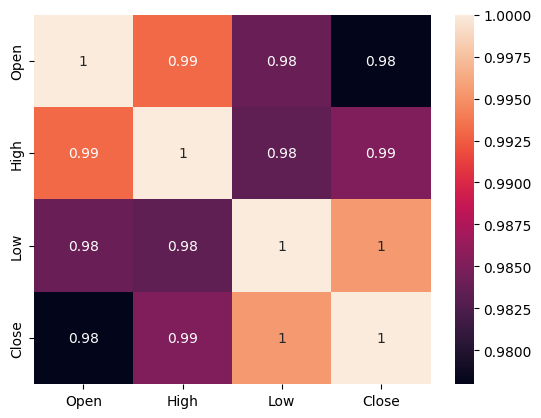

In [ ]:
# checking the correlation
sns.heatmap(df1.corr(),annot=True)
plt.show()

In [ ]:
# spliting the columns in x and y axis
x=df1.iloc[:,:-1]
y=df1["Close"]

In [ ]:
# Multicollinearity detection
def calc_vif(ax):
  # calculating VIF
  vif=pd.DataFrame()
  vif["Variables"]=x.columns
  vif["VIF"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

  return(vif)

calc_vif(x)

,Variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


In [ ]:
# splitting the data into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
# importing scaler library for the transformation
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# fit and transform the train and test data
scaler=MinMaxScaler()

x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
x_train.shape

(148, 3)

In [ ]:
x_test.shape

(37, 3)

In [ ]:
# fit the linear regression model
linear_reg=LinearRegression()

linear_model=linear_reg.fit(x_train,y_train)

In [ ]:
# predicting the value
y_pred=linear_model.predict(x_test)

In [ ]:
# checking the coeffecinent of the linea_model
linear_model.coef_

array([-181.85661918,  210.84639092,  330.96928956])

In [ ]:
# cheking the train accuracy of the linear model
train_accuracy = linear_model.score(x_train,y_train)*100
print(f'Training accuracy of the dataset for linear regression model is {train_accuracy} %.')

Training accuracy of the dataset for linear regression model is 99.61188216222025 %.


In [ ]:
# cheking the test accuracy of the linear model
test_accuracy = linear_model.score(x_test,y_test)*100
print(f'Test accuracy of the dataset for linear regression is {test_accuracy} %.')

Test accuracy of the dataset for linear regression is 99.04142726548665 %.


In [ ]:
# calculating the mse,rmse and r_squared values
MSE  = mean_squared_error((y_test), (y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

R_squared = r2_score((y_test), (y_pred))
print("R_squared :" ,R_squared)

MSE : 86.64379126513747
RMSE : 9.308264675283867
R_squared : 0.9904142726548665


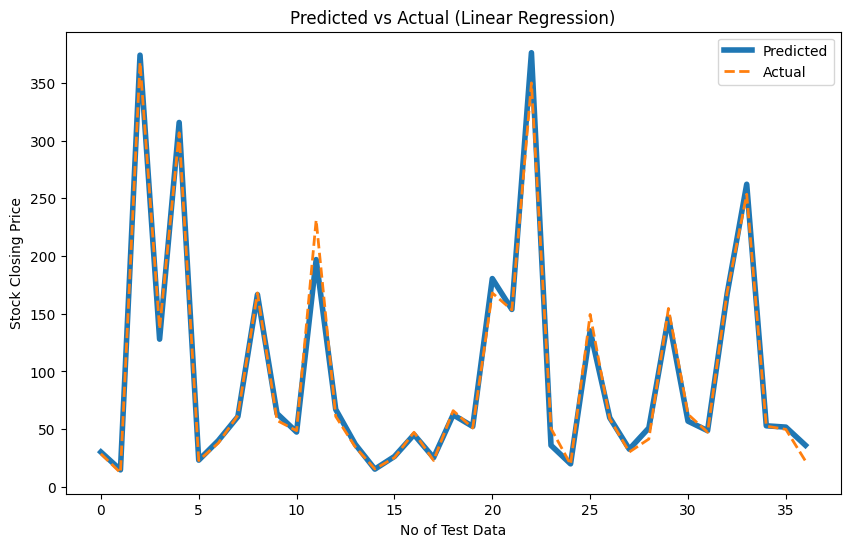

In [ ]:
# checking the predicted and actual values on the graph
plt.figure(figsize=(10,6))
plt.plot(y_pred,linewidth=4)
plt.plot(np.array(y_test),linestyle="--",linewidth=2)
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.ylabel('Stock Closing Price')
plt.title('Predicted vs Actual (Linear Regression)')
plt.show()

In [ ]:
# Dataframe to store metrics.
i = 0
eval_metrics = pd.DataFrame()

In [ ]:
# Inserting linear regression evaluation metrics into the dataframe
eval_metrics.loc[i,"Model Name"]="Linear Regression"
eval_metrics.loc[i,"MSE"]=round(MSE,4)
eval_metrics.loc[i,"RMSE"]=round(RMSE,4)
eval_metrics.loc[i,"R_squared"]=round(R_squared,4)

i+=1

In [ ]:
# importing the ridge to perform ridge regression
from sklearn.linear_model import Ridge

In [ ]:
# Ridge regression
ridge=Ridge(alpha=0.1)
ridge.fit(x_train,y_train)

Ridge(alpha=0.1)

In [ ]:
# Checking the training accuracy
ridge_train_accuracy=ridge.score(x_train,y_train)*100
print(f"Training accuracy for the dataset for ridge regression model is: {ridge_train_accuracy}%.")

Training accuracy for the dataset for ridge regression model is: 99.3787322629731%.


In [ ]:
# importing the gridsearch for cross validation
from sklearn.model_selection import GridSearchCV

In [ ]:
# cross validation
ridge=Ridge()
parameters={"alpha":[1e-15,1e-10,1e-5,1e-4,1e-3,1e-2,1e-1,1,2,3,4,5,10,20,30,40,50,60,70,80,90,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring="neg_mean_squared_error",cv=3)
ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-05, 0.0001, 0.001, 0.01,
                                   0.1, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60,
                                   70, 80, 90, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
# getting the best fit alpha and mse
print("Best fit alpha value:",ridge_regressor.best_params_)
print("Using ",ridge_regressor.best_params_,"the negative mean squared error is: ",ridge_regressor.best_score_)

Best fit alpha value: {'alpha': 0.001}
Using  {'alpha': 0.001} the negative mean squared error is:  -48.413635758178486


In [ ]:
# predicted values
y_pred_ridge=ridge_regressor.predict(x_test)
y_pred_ridge

array([ 30.19313891,  14.69973514, 373.82071194, 127.86155708,
       315.73842774,  23.09924597,  40.03182741,  60.78287182,
       166.62150131,  63.39935437,  47.54884576, 196.83447698,
        67.06394761,  36.87950187,  15.32241102,  26.27295152,
        45.22701788,  25.30222887,  62.47678894,  52.30188886,
       180.77428998, 153.72796402, 376.03735128,  36.00716841,
        19.92614835, 135.19954596,  59.88839768,  32.6146522 ,
        51.02959304, 146.91641135,  56.89470501,  48.69578467,
       167.4445837 , 262.18678774,  52.95196985,  51.72848385,
        35.88301302])

In [ ]:
# Evaluation metrics
MSE=mean_squared_error((y_test),(y_pred_ridge))
print("MSE:",MSE)

RMSE=np.sqrt(MSE)
print("RMSE:",RMSE)

R_squarred=r2_score((y_test),(y_pred_ridge))
print("R_squared:",R_squarred)

MSE: 86.6436380798195
RMSE: 9.308256446822869
R_squared: 0.9904142896023324


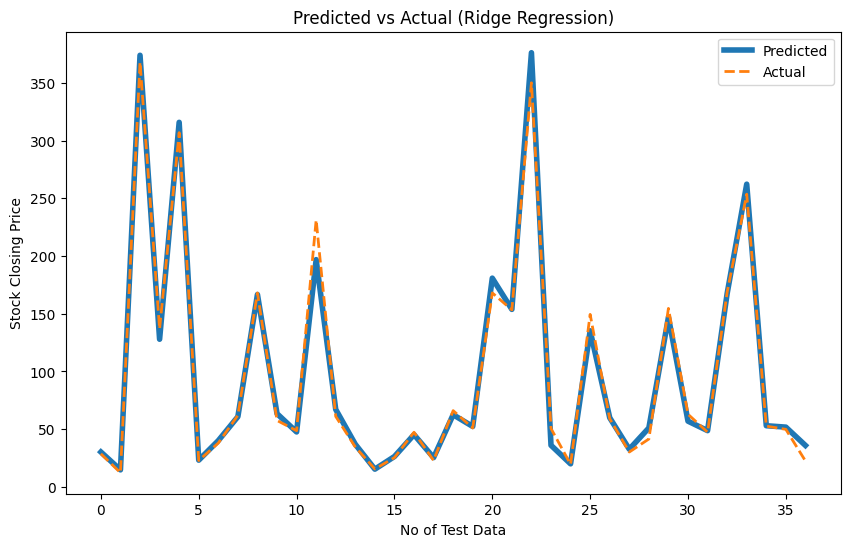

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(y_pred_ridge,linewidth=4)
plt.plot(np.array(y_test),linewidth=2,linestyle="--")
plt.legend(["Predicted","Actual"])
plt.xlabel("No of Test Data")
plt.ylabel("Stock Closing Price")
plt.title("Predicted vs Actual (Ridge Regression)")
plt.show()

In [ ]:
eval_metrics.loc[i,"Model Name"]="Ridge Regression"
eval_metrics.loc[i,"MSE"]=round(MSE,4)
eval_metrics.loc[i,"RMSE"]=round(RMSE,4)
eval_metrics.loc[i,"R_squared"]=round(R_squarred,4)

i+=1

In [ ]:
# Importing the lasso
from sklearn.linear_model import Lasso

In [ ]:
# Fitting data into Lasso Regression algorithm
lasso=Lasso(alpha=0.0001,max_iter=2000)
lasso.fit(x_train,y_train)

Lasso(alpha=0.0001, max_iter=2000)

In [ ]:
# checking training accuracy
lasso_train_accuracy=lasso.score(x_train,y_train)*100
print(f"Training accuracy of the dataset for Lasso regression model is: {lasso_train_accuracy}%.")

Training accuracy of the dataset for Lasso regression model is: 99.61188190844585%.


In [ ]:
# Cross validation
lasso=Lasso()
parameters={"alpha":[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring="neg_mean_squared_error",cv=7)
lasso_regressor.fit(x_train,y_train)

GridSearchCV(cv=7, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("Best fit alpha value:",lasso_regressor.best_params_)
print("Using",lasso_regressor.best_params_,"the negative mean squared error is:",lasso_regressor.best_score_)

Best fit alpha value: {'alpha': 0.01}
Using {'alpha': 0.01} the negative mean squared error is: -47.73908685167992


In [ ]:
y_pred_lasso=lasso_regressor.predict(x_test)

In [ ]:
# Evaluation metrics
mse=mean_squared_error((y_test),(y_pred_lasso))
print("MSE:",mse)

rmse=np.sqrt(mse)
print("RMSE:",rmse)

r_squared=r2_score((y_test),(y_pred_lasso))
print("R_squared:",r_squared)

MSE: 86.93829632522768
RMSE: 9.324070802242316
R_squared: 0.9903816904563435


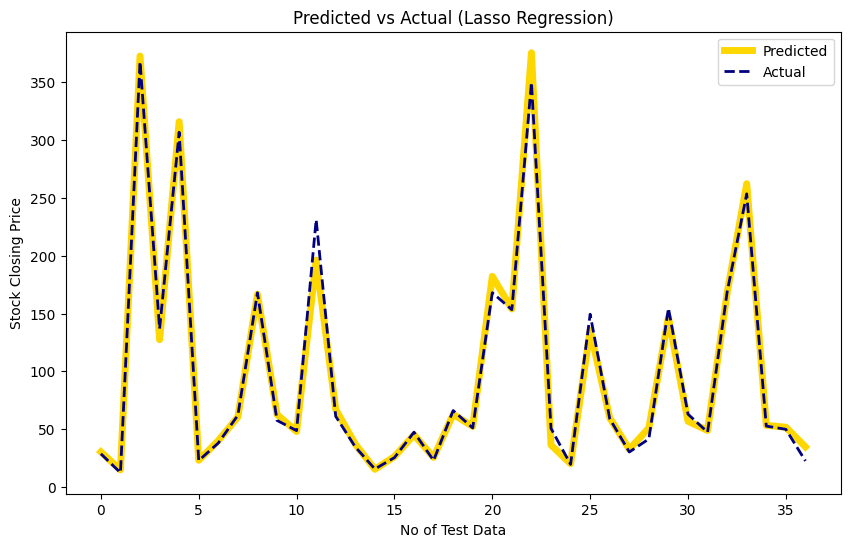

In [ ]:
# Visualisation
plt.figure(figsize=(10,6))
plt.plot(y_pred_lasso,color='gold',linewidth=5)
plt.plot(np.array(y_test),color='navy',linestyle="--",linewidth=2)
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.ylabel('Stock Closing Price')
plt.title('Predicted vs Actual (Lasso Regression)')
plt.show()

In [ ]:
eval_metrics.loc[i,"Model Name"]="Lasso Regression"
eval_metrics.loc[i,"MSE"]=round(MSE,4)
eval_metrics.loc[i,"RMSE"]=round(RMSE,4)
eval_metrics.loc[i,"R_squared"]=round(r_squared,4)

i+=1

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
# Hyperparameter tuning
params={"n_neighbors":[2,3,4,5,6,7,8,9]}
knn=KNeighborsRegressor()
model_knn=GridSearchCV(knn,params,cv=5)

In [ ]:
# Fitting the model.
model_knn.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9]})

In [ ]:
# Predicted values
y_pred_knn=model_knn.predict(x_test)

In [ ]:
# Evaluation metrics
mse=mean_squared_error((y_test),(y_pred_knn))
print("MSE:",mse)

rmse=np.sqrt(mse)
print("RMSE:",rmse)

r_squared=r2_score((y_test),(y_pred_knn))
print("R_squared:",r_squared)

MSE: 294.23975067567557
RMSE: 17.15341804643248
R_squared: 0.9674471536518282


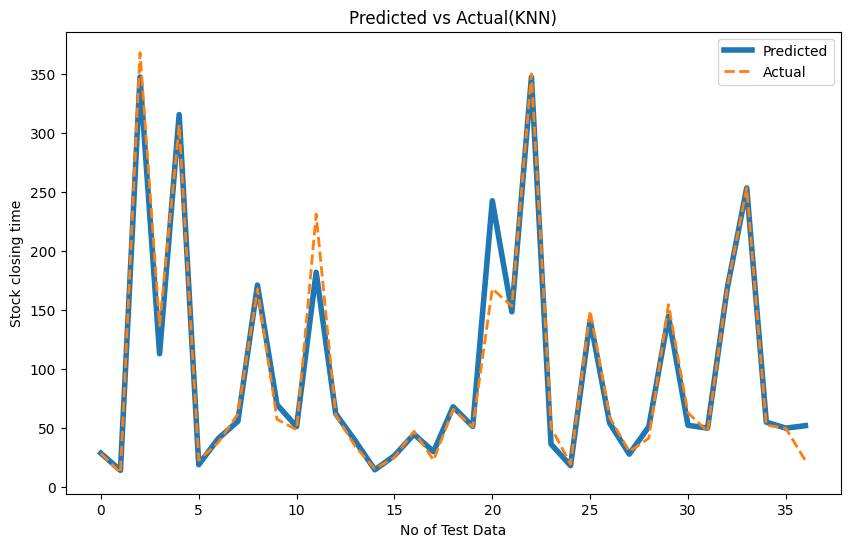

In [ ]:
# visualisation
plt.figure(figsize=(10,6))
plt.plot(y_pred_knn,linewidth=4)
plt.plot(np.array(y_test),linewidth=2,linestyle="--")
plt.legend(["Predicted","Actual"])
plt.xlabel("No of Test Data")
plt.ylabel("Stock closing time")
plt.title("Predicted vs Actual(KNN)")
plt.show()

In [ ]:
eval_metrics.loc[i,"Model Name"]="KNN"
eval_metrics.loc[i,"MSE"]=round(mse,4)
eval_metrics.loc[i,"RMSE"]=round(rmse,4)
eval_metrics.loc[i,"R_squared"]=round(r_squared,4)

i+=1

In [ ]:
eval_metrics.sort_values(by=["MSE"],inplace=True)

In [ ]:
eval_metrics

,Model Name,MSE,RMSE,R_squared
1,Ridge Regression,86.6436,9.3083,0.9904
2,Lasso Regression,86.6436,9.3083,0.9904
0,Linear Regression,86.6438,9.3083,0.9904
3,KNN,294.2398,17.1534,0.9674


In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'sq_open', 'sq_high', 'sq_low',
       'sq_close', 'log_open', 'log_high', 'log_low', 'log_close'],
      dtype='object')

In [ ]:
df2=df.drop(columns=["Date","Open","High","Low","Close","log_open","log_close","log_high","log_low"],axis=1)

In [ ]:
df2.columns

Index(['sq_open', 'sq_high', 'sq_low', 'sq_close'], dtype='object')

In [ ]:
x=df2.iloc[:,:-1]
y=df2["sq_close"]

In [ ]:
df3=df.drop(columns=["Date","Open","High","Low","Close","sq_open","sq_close","sq_high","sq_low"])

In [ ]:
df3.columns

Index(['log_open', 'log_high', 'log_low', 'log_close'], dtype='object')

In [ ]:
x1=df3.iloc[:,:-1]
y1=df3["log_close"]

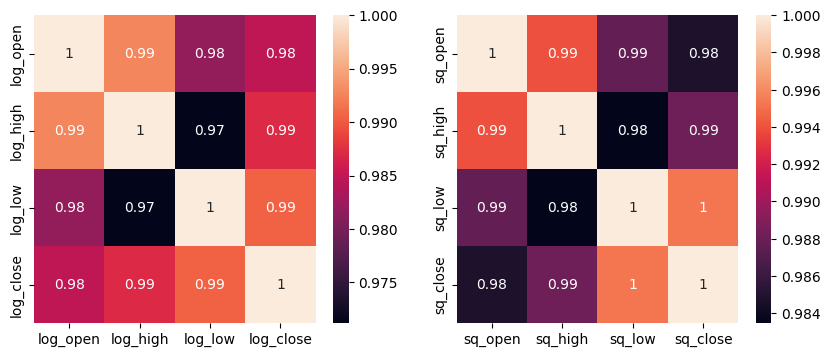

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.heatmap(df3.corr(),annot=True)

plt.subplot(1,2,2)
sns.heatmap(df2.corr(),annot=True)
plt.show()